# Task 1 — Image Formation & Sampling

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from scipy.fft import fft2, fftshift

# ====== CONFIG ======

In [3]:
IMG_PATH = "../img/car.jpg"
DOWNSAMPLE_FACTORS = [2, 4, 8]
SAVE_OUTPUTS = True
OUT_DIR = "task1_outputs"

os.makedirs(OUT_DIR, exist_ok=True)

# ---- Load image (convert to grayscale float [0,1]) ----

In [4]:
img_in = io.imread(IMG_PATH)
if img_in.ndim == 3:
    img = color.rgb2gray(img_in)
else:
    img = img_in
img = img_as_float(img)

# ---- Helpers ----

In [5]:
def magnitude_spectrum(im):
    F = fft2(im)
    F_shift = fftshift(F)               # shift DC to center
    mag = np.log1p(np.abs(F_shift))     # log scale for visibility
    return mag

def downsample_naive(im, factor):
    # pick every k-th pixel (no prefilter): shape roughly (H/f, W/f)
    return im[::factor, ::factor]

def downsample_prefilter(im, factor, sigma=None):
    # Rule of thumb: sigma ≈ factor/2 for anti-aliasing
    s = sigma if sigma is not None else factor / 2.0
    blurred = gaussian(im, sigma=s, preserve_range=True)
    return blurred[::factor, ::factor]

def show_and_maybe_save(arr, title, fname=None):
    plt.figure()
    plt.imshow(arr, cmap="gray", vmin=0, vmax=arr.max() if arr.ndim==2 else None)
    plt.title(title)
    plt.axis("off")
    if SAVE_OUTPUTS and fname:
        path = os.path.join(OUT_DIR, fname)
        plt.savefig(path, bbox_inches="tight", pad_inches=0)
    plt.show()

# ---- Original + spectrum ----

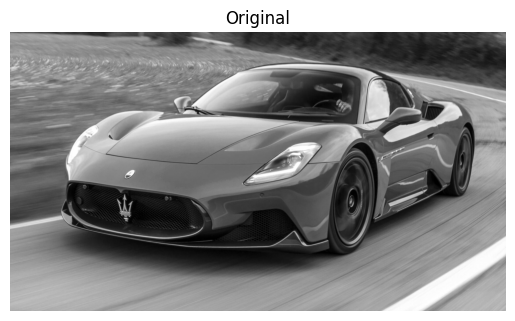

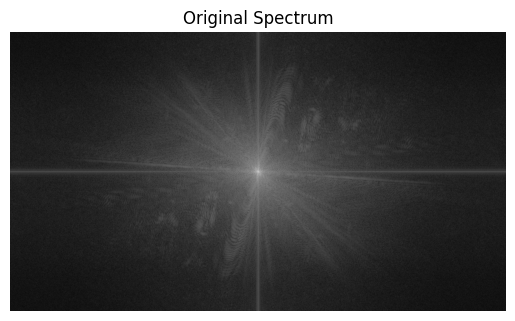

In [6]:
show_and_maybe_save(img, "Original", "original.png")
show_and_maybe_save(magnitude_spectrum(img), "Original Spectrum", "original_spectrum.png")

# ---- Downsampling (naive vs prefilter) + spectra ----

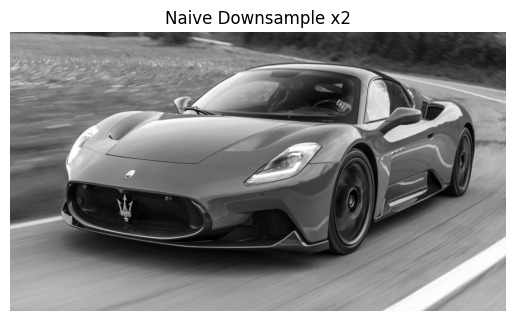

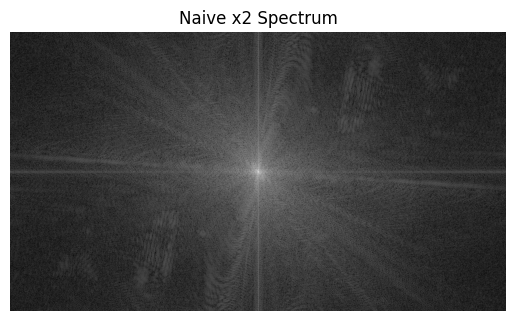

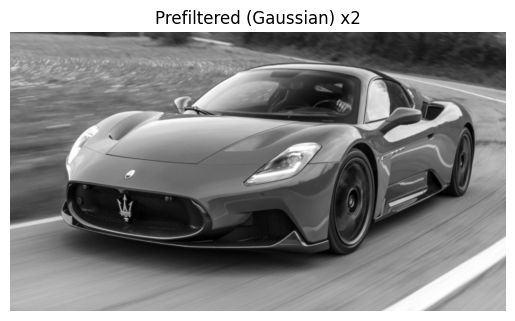

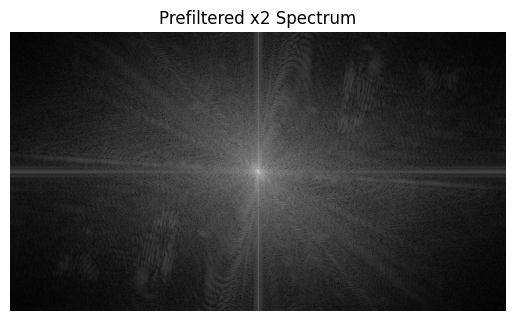

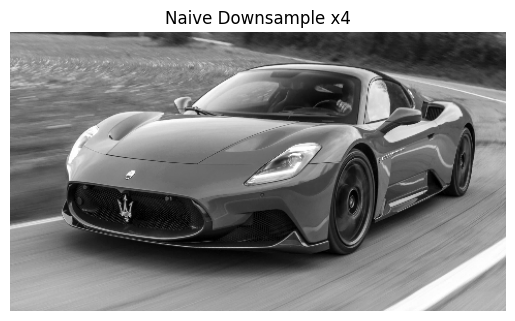

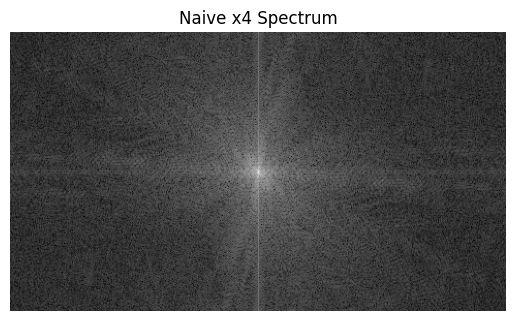

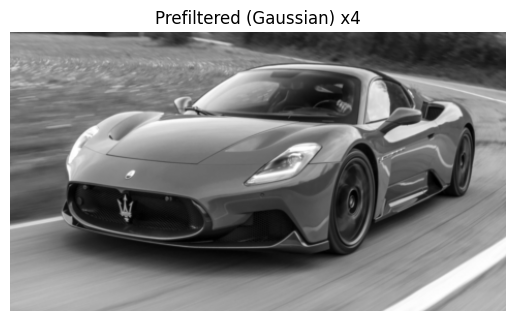

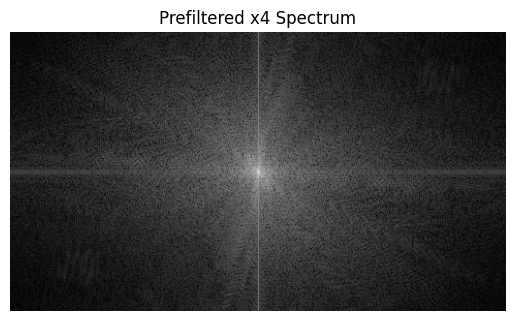

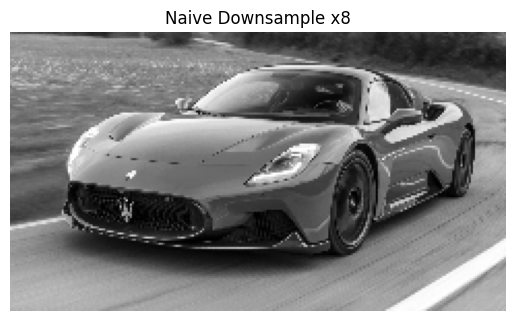

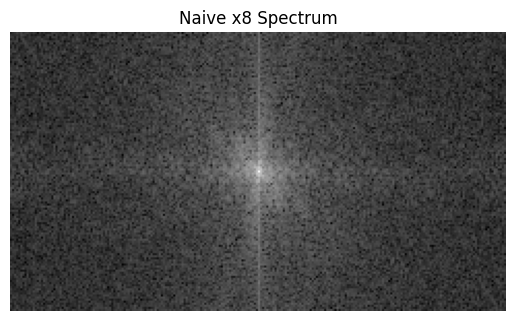

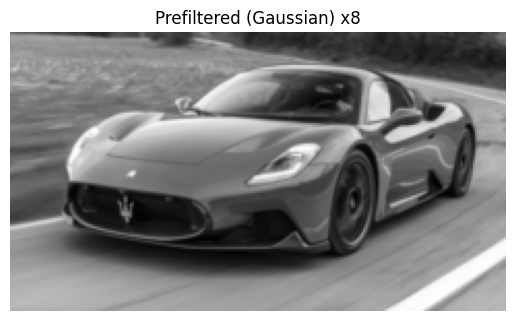

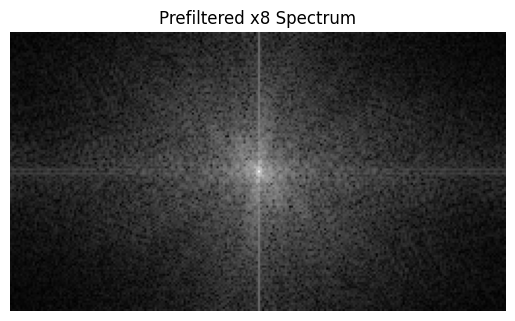

In [7]:
for f in DOWNSAMPLE_FACTORS:
    # Naive
    im_naive = downsample_naive(img, f)
    show_and_maybe_save(im_naive, f"Naive Downsample x{f}", f"naive_x{f}.png")
    show_and_maybe_save(magnitude_spectrum(im_naive), f"Naive x{f} Spectrum", f"naive_x{f}_spectrum.png")

    # Prefiltered (Gaussian) before sampling
    im_pref = downsample_prefilter(img, f)
    show_and_maybe_save(im_pref, f"Prefiltered (Gaussian) x{f}", f"prefilter_x{f}.png")
    show_and_maybe_save(magnitude_spectrum(im_pref), f"Prefiltered x{f} Spectrum", f"prefilter_x{f}_spectrum.png")

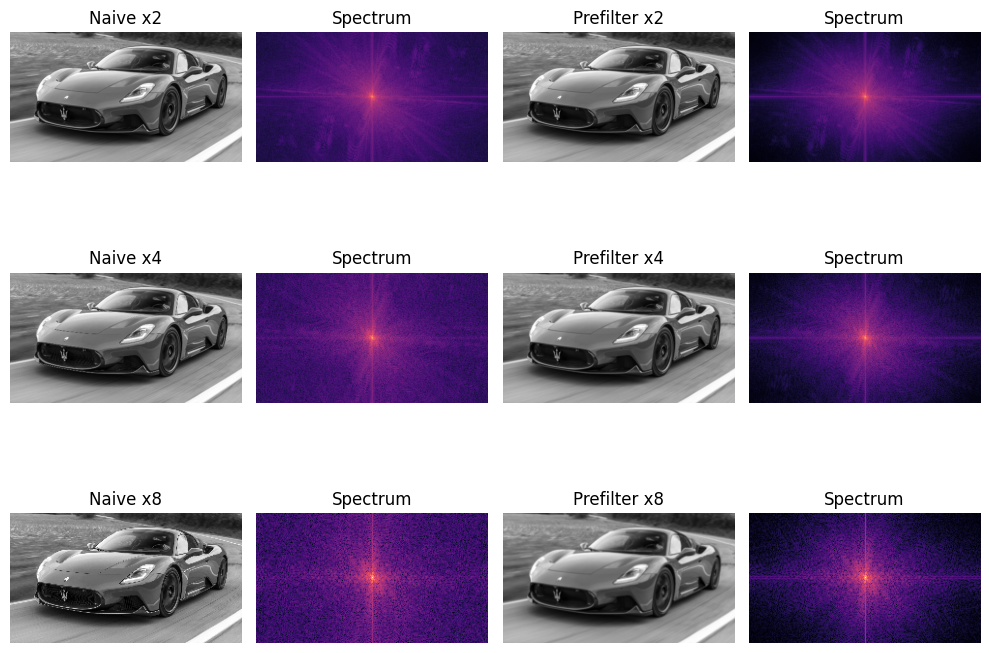

In [8]:
fig, axs = plt.subplots(3, 4, figsize=(10,8))
for r, f in enumerate([2,4,8]):
    naive = downsample_naive(img, f)
    pref  = downsample_prefilter(img, f)
    axs[r,0].imshow(naive, cmap='gray'); axs[r,0].set_title(f'Naive x{f}')
    axs[r,1].imshow(magnitude_spectrum(naive), cmap='magma'); axs[r,1].set_title('Spectrum')
    axs[r,2].imshow(pref, cmap='gray'); axs[r,2].set_title(f'Prefilter x{f}')
    axs[r,3].imshow(magnitude_spectrum(pref), cmap='magma'); axs[r,3].set_title('Spectrum')
    for c in range(4): axs[r,c].axis('off')
plt.tight_layout(); 
if SAVE_OUTPUTS: plt.savefig(os.path.join(OUT_DIR, 'grid_downsample_vs_prefilter.png'), dpi=200)
plt.show()


# ---- Explain ----

Prefiltering with a low-pass (e.g., Gaussian) before downsampling attenuates high-frequency content above the new Nyquist limit (half the post-downsample sampling rate). Without this, high frequencies fold into lower frequencies (aliasing), producing moiré and jagged artifacts. Thus, low-pass prefiltering enforces the sampling theorem and prevents aliasing.

In [8]:
nyquist_explanation = (
    "Prefiltering with a low-pass (e.g., Gaussian) before downsampling attenuates high-frequency content above the new Nyquist limit (half the post-downsample sampling rate). Without this, high frequencies fold into lower frequencies (aliasing), producing moiré and jagged artifacts. Thus, low-pass prefiltering enforces the sampling theorem and prevents aliasing."
)

print("\n--- Why prefiltering avoids aliasing (≤100 words) ---\n")
print(nyquist_explanation)

if SAVE_OUTPUTS:
    with open(os.path.join(OUT_DIR, "nyquist_explanation.txt"), "w", encoding="utf-8") as f:
        f.write(nyquist_explanation)


--- Why prefiltering avoids aliasing (≤100 words) ---

Prefiltering with a low-pass (e.g., Gaussian) before downsampling attenuates high-frequency content above the new Nyquist limit (half the post-downsample sampling rate). Without this, high frequencies fold into lower frequencies (aliasing), producing moiré and jagged artifacts. Thus, low-pass prefiltering enforces the sampling theorem and prevents aliasing.
